`Martín Alexis Martínez Andrade`

**This notebook was made in Google Colab.**

# Libraries

* pandas
* numpy
* matplotlib

# P3: Data Visualization

## (Optional) Download modified_clean_data.csv from Dropbox

In [46]:
# download file from dropbox
!wget -O modified_clean_data.csv https://www.dropbox.com/scl/fi/8pnm0884bksvfcyxep4ec/modified_clean_data.csv?rlkey=n8qd7e299e1bydtfiwemsdeig&st=89yik26c&dl=1

--2025-09-14 08:19:13--  https://www.dropbox.com/scl/fi/8pnm0884bksvfcyxep4ec/modified_clean_data.csv?rlkey=n8qd7e299e1bydtfiwemsdeig
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc480351816144c15a84cc90a982.dl.dropboxusercontent.com/cd/0/inline/CxXPa_Q61ZHaqDxbqwcYLK63cFOrr4A-q6XfUgXEBc3u2-WdL4sxmGM0wq2z_olw0s4dVgUT5VVxLEi7jVNPwkak8RpcMPjXRm4zUkExsLPrJVK7DmTWzWpGJy0wgQfaqk-0a59C_ctZL2T1Tlp14fcx/file# [following]
--2025-09-14 08:19:13--  https://uc480351816144c15a84cc90a982.dl.dropboxusercontent.com/cd/0/inline/CxXPa_Q61ZHaqDxbqwcYLK63cFOrr4A-q6XfUgXEBc3u2-WdL4sxmGM0wq2z_olw0s4dVgUT5VVxLEi7jVNPwkak8RpcMPjXRm4zUkExsLPrJVK7DmTWzWpGJy0wgQfaqk-0a59C_ctZL2T1Tlp14fcx/file
Resolving uc480351816144c15a84cc90a982.dl.dropboxusercontent.com (uc480351816144c15a84cc90a982.dl.dropboxusercontent.com)... 162.125.5

## Load dataset

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(f"modified_clean_data.csv")

## Distribution of the variables

In [48]:
print(df.dtypes)

Id                          int64
ProductId                  object
UserId                     object
ProfileName                object
HelpfulnessNumerator        int64
HelpfulnessDenominator      int64
Score                       int64
Timestamp                   int64
Summary                    object
Text                       object
Date                       object
HelpfulnessScore          float64
ReviewLength                int64
LengthCategory             object
dtype: object


### Scores

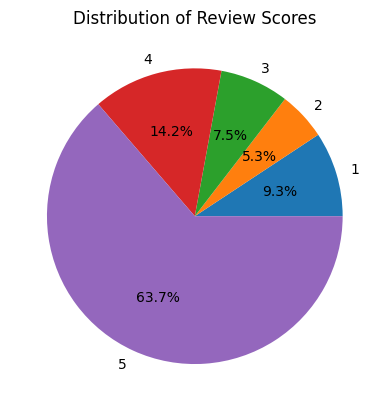

In [49]:
score_counts = df['Score'].value_counts().sort_index()
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Review Scores")
plt.show()

~78% of reviews score 4 stars or higher. Also, 1 stars reviews are slightly more frequent than 2 stars reviews and 3 stars reviews.

### Review lengths

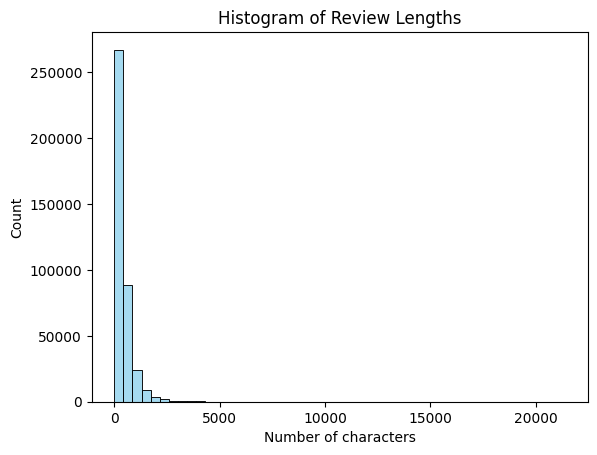

count    396288.000000
mean        436.171855
std         438.209809
min          12.000000
25%         182.000000
50%         304.000000
75%         529.000000
max       21409.000000
Name: ReviewLength, dtype: float64


In [50]:
sns.histplot(df['ReviewLength'], bins=50, color="skyblue")
plt.title("Histogram of Review Lengths")
plt.xlabel("Number of characters")
plt.show()

print(df['ReviewLength'].describe())

As shown by the quartiles and the histogram plot, 75% of reviews do not surpass 529 characters. Let's see how 529+ characters reviews distribute.

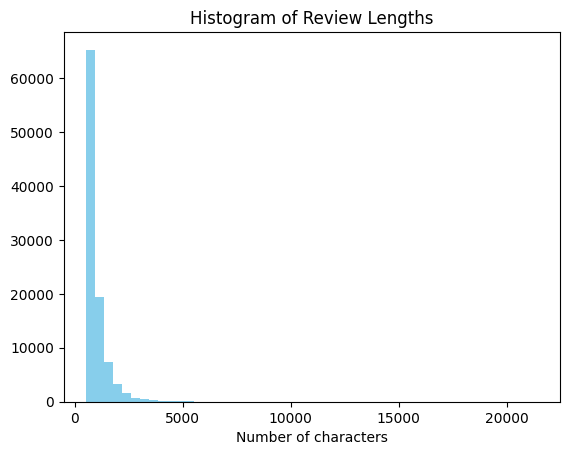

count    98835.000000
mean       970.270127
std        589.631237
min        530.000000
25%        632.000000
50%        787.000000
75%       1088.000000
max      21409.000000
Name: ReviewLength, dtype: float64


In [51]:
df_review_length_greater_than = df[df['ReviewLength'] > 529]

plt.hist(df_review_length_greater_than["ReviewLength"], bins=50, color="skyblue")
plt.title("Histogram of Review Lengths")
plt.xlabel("Number of characters")
plt.show()

print(df_review_length_greater_than["ReviewLength"].describe())

Still, the histogram shows a Pareto-like distribution. Let's run this plot a few more times.

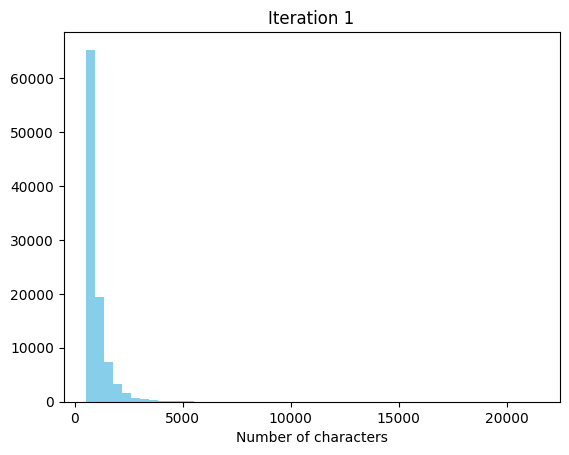

Iteration 1 - Statistics for ReviewLength (N=98835, 396288 total):
count    98835.000000
mean       970.270127
std        589.631237
min        530.000000
25%        632.000000
50%        787.000000
75%       1088.000000
max      21409.000000
Name: ReviewLength, dtype: float64
--------------------------------------------------


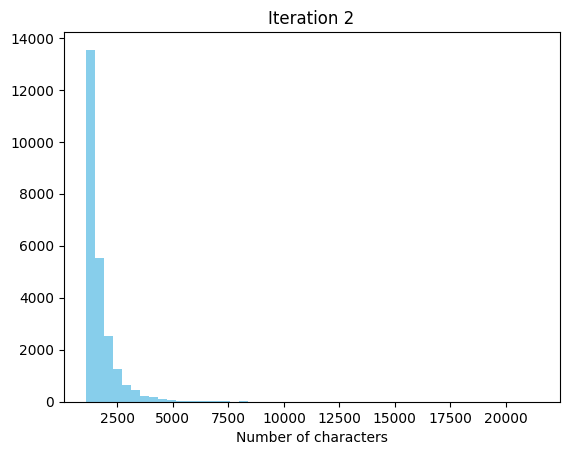

Iteration 2 - Statistics for ReviewLength (N=24675, 396288 total):
count    24675.000000
mean      1685.962351
std        800.805445
min       1089.000000
25%       1227.000000
50%       1439.000000
75%       1842.000000
max      21409.000000
Name: ReviewLength, dtype: float64
--------------------------------------------------


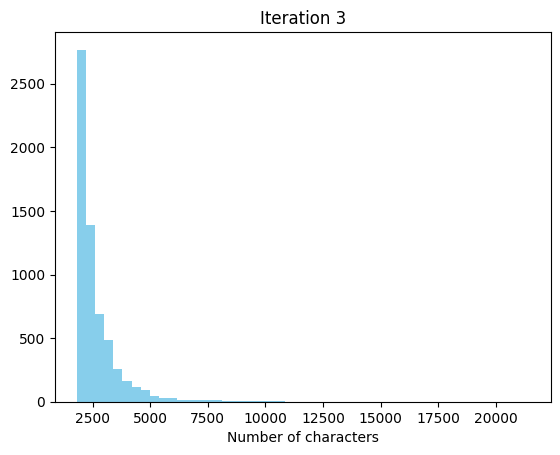

Iteration 3 - Statistics for ReviewLength (N=6166, 396288 total):
count     6166.000000
mean      2653.988485
std       1091.987192
min       1843.000000
25%       2028.250000
50%       2304.000000
75%       2869.000000
max      21409.000000
Name: ReviewLength, dtype: float64
--------------------------------------------------


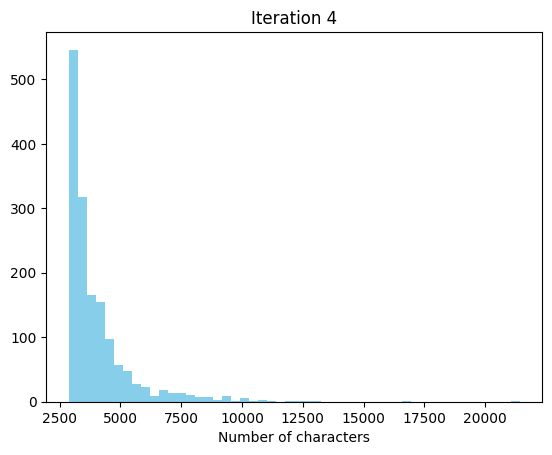

Iteration 4 - Statistics for ReviewLength (N=1540, 396288 total):
count     1540.000000
mean      3990.987013
std       1471.999588
min       2870.000000
25%       3127.750000
50%       3481.000000
75%       4288.500000
max      21409.000000
Name: ReviewLength, dtype: float64
--------------------------------------------------


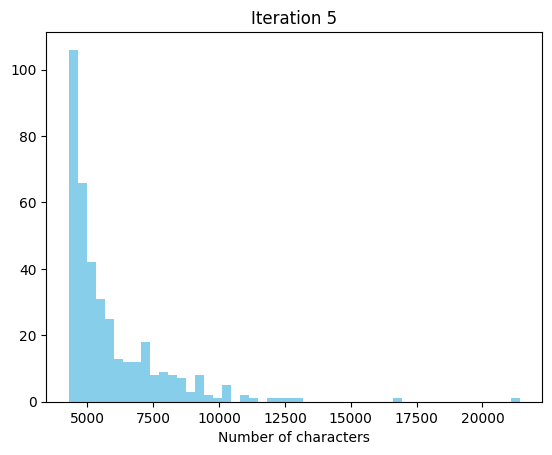

Iteration 5 - Statistics for ReviewLength (N=385, 396288 total):
count      385.000000
mean      5850.127273
std       1903.795350
min       4290.000000
25%       4622.000000
50%       5174.000000
75%       6599.000000
max      21409.000000
Name: ReviewLength, dtype: float64
--------------------------------------------------


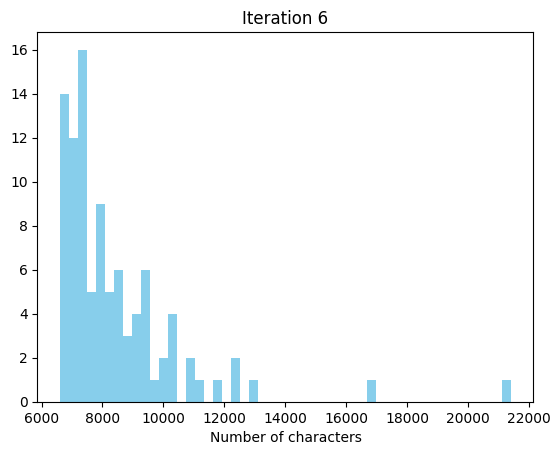

Iteration 6 - Statistics for ReviewLength (N=96, 396288 total):
count       96.000000
mean      8439.479167
std       2155.020552
min       6606.000000
25%       7169.750000
50%       7862.500000
75%       9177.750000
max      21409.000000
Name: ReviewLength, dtype: float64
--------------------------------------------------


In [52]:
df_review_length_greater_than = df.copy()

for i in range(6):
    # Calculate 75th percentile (upper quartile) for the current subset
    q75 = df_review_length_greater_than['ReviewLength'].quantile(0.75)

    # Filter reviews longer than this percentile
    df_review_length_greater_than = df_review_length_greater_than[df_review_length_greater_than['ReviewLength'] > q75]

    plt.hist(df_review_length_greater_than["ReviewLength"], bins=50, color="skyblue")
    plt.title(f"Iteration {i+1}")
    plt.xlabel("Number of characters")
    plt.show()

    print(f"Iteration {i+1} - Statistics for ReviewLength (N={len(df_review_length_greater_than)}, {df.shape[0]} total):")
    print(df_review_length_greater_than["ReviewLength"].describe())
    print('-'*50)

We can see the distribution seems to be a Pareto distribution even in the 6th iteration of getting the upper quartile.

25% of reviewers write reviews longer than 529 characters; 25% of 25% (6.25%) of reviewers use more than 1088 characters in their reviews. **Thus, 93.75% of reviewers' length needs can be covered by setting a maximum review length of 1088**.

Just out of curiosity, let's see the longest review.

In [53]:
# show review with longest text
longest_review = df[df["ReviewLength"] == df["ReviewLength"].max()]

text = str(longest_review["Text"].item())
date = str(longest_review["Date"].item())
score = str(longest_review["Score"].item())
help_score = str(longest_review["HelpfulnessScore"].item())
positive_helpfulness_votes = f"{longest_review['HelpfulnessNumerator'].item()}/{longest_review['HelpfulnessDenominator'].item()}"

print(f"Length: {len(text)}")
print(f"Date: {date}")
print(f"Score: {score}")
print(f"Helpfulness Score: {help_score} ({positive_helpfulness_votes})")

# every n chars, print a newline (to make reading the text easier)
chars_per_line = 140
for i in range(0, len(text), chars_per_line):
    print(text[i:i+chars_per_line])


Length: 21409
Date: 2012-09-22
Score: 3
Helpfulness Score: 0.9090909090909092 (10/11)
Fuzzy Wuzzy's Summary:<br />*** Somewhat recommended, with reservations and only lukewarm fuzzies.<br /><br />Positives:<br /><br />+ Not to
o expensive compared to other bottled water, although it is not cheap either.<br /><br />Negatives:<br /><br />- This bottled water product'
s labeling, product descriptions, and health claims are misleading.<br /><br />At first glance, this 1.5-liter bottle of water that I am rev
iewing looks like another one of the many varieties of bottled water on the market.  There are many kinds of bottled water: "spring water" p
roduced from an underground formation where the groundwater naturally flows up to the Earth's surface, "artesian water" obtained from a well
 that taps into an underground aquifer, "mineral water" produced from a well or spring that naturally contains trace amounts of minerals tha
t some people consider to provide health benefits, "ground/well wate

A pretty passionate review.

## Review's helpfulness score voted by other users and score given to the product by that review

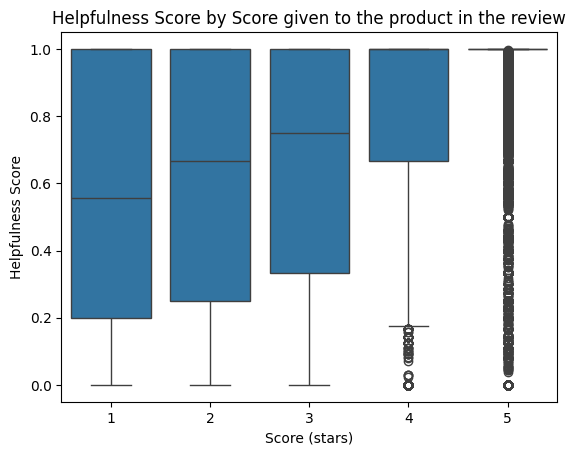

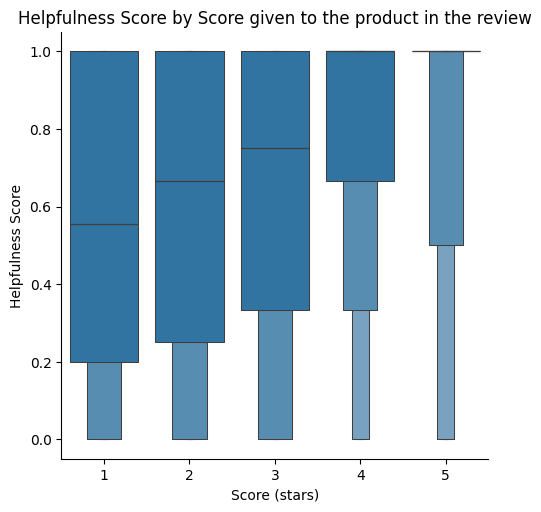

          count      mean       std  min       25%       50%  75%  max
Score                                                                 
1       27535.0  0.550348  0.380442  0.0  0.200000  0.555556  1.0  1.0
2       13301.0  0.585320  0.388198  0.0  0.250000  0.666667  1.0  1.0
3       16734.0  0.637038  0.392476  0.0  0.333333  0.750000  1.0  1.0
4       27359.0  0.799139  0.339224  0.0  0.666667  1.000000  1.0  1.0
5      125920.0  0.875540  0.273348  0.0  1.000000  1.000000  1.0  1.0


In [54]:
sns.boxplot(x='Score', y='HelpfulnessScore', data=df)
plt.title("Helpfulness Score by Score given to the product in the review")
plt.xlabel("Score (stars)")
plt.ylabel("Helpfulness Score")
plt.show()

sns.catplot(x='Score', y='HelpfulnessScore', data=df, kind="boxen")
plt.title("Helpfulness Score by Score given to the product in the review")
plt.xlabel("Score (stars)")
plt.ylabel("Helpfulness Score")
plt.show()


print(df.groupby('Score')['HelpfulnessScore'].describe())

Let's also plot this as histograms so that the boxplots are better explained.

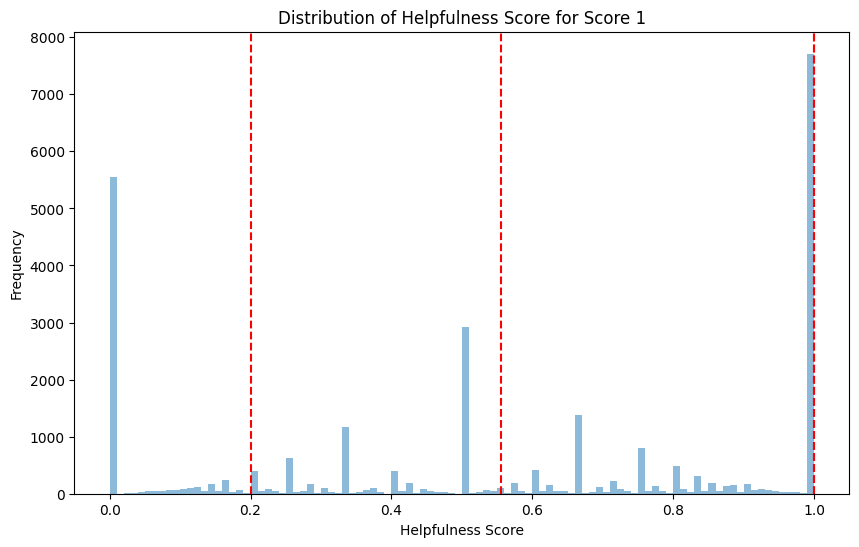

count    27535.000000
mean         0.550348
std          0.380442
min          0.000000
25%          0.200000
50%          0.555556
75%          1.000000
max          1.000000
Name: HelpfulnessScore, dtype: float64


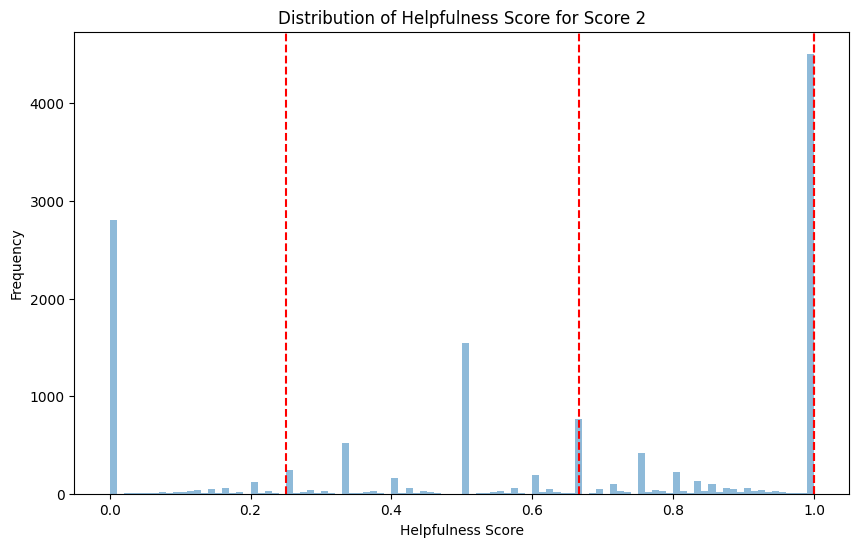

count    13301.000000
mean         0.585320
std          0.388198
min          0.000000
25%          0.250000
50%          0.666667
75%          1.000000
max          1.000000
Name: HelpfulnessScore, dtype: float64


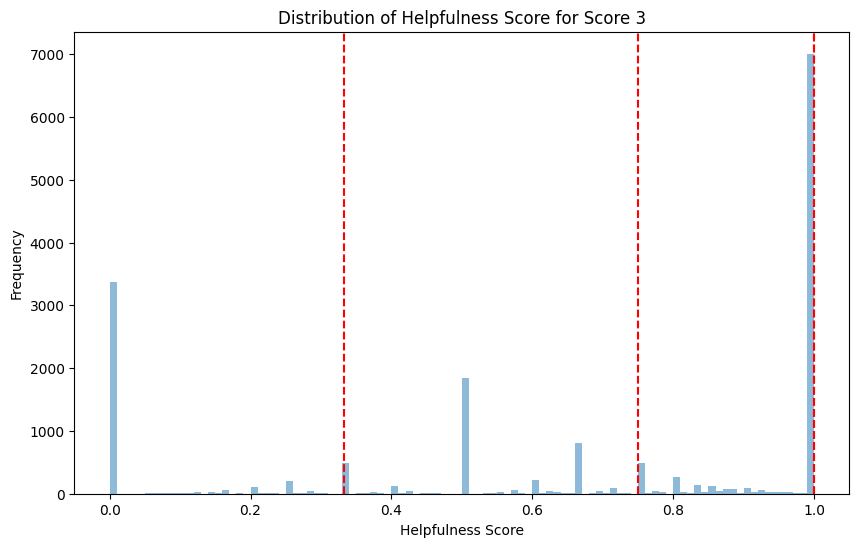

count    16734.000000
mean         0.637038
std          0.392476
min          0.000000
25%          0.333333
50%          0.750000
75%          1.000000
max          1.000000
Name: HelpfulnessScore, dtype: float64


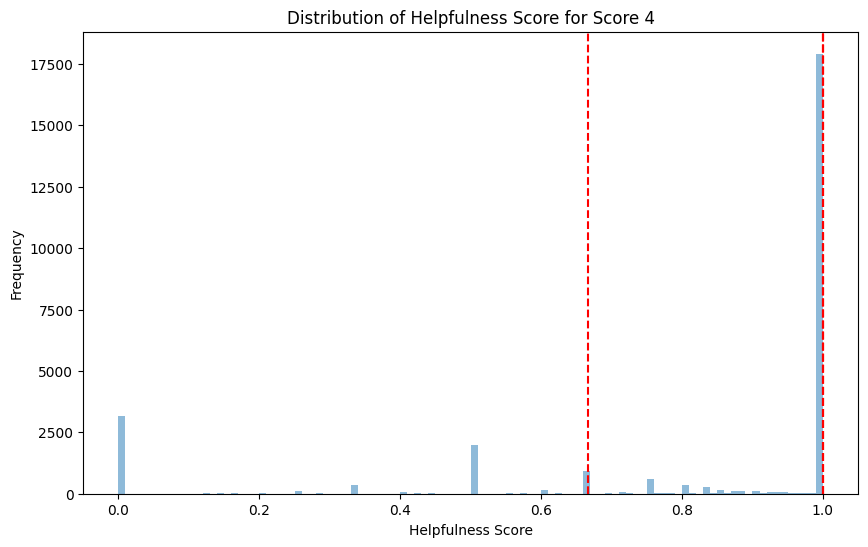

count    27359.000000
mean         0.799139
std          0.339224
min          0.000000
25%          0.666667
50%          1.000000
75%          1.000000
max          1.000000
Name: HelpfulnessScore, dtype: float64


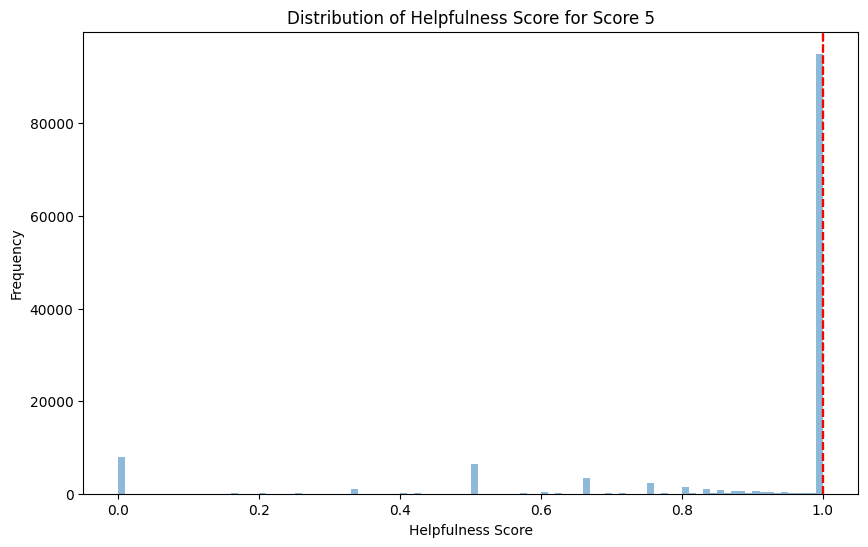

count    125920.000000
mean          0.875540
std           0.273348
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: HelpfulnessScore, dtype: float64


In [55]:
# plot distribution of each grouped score
for score in range(1, 6):
    plt.figure(figsize=(10, 6))
    plt.hist(df[df['Score'] == score]['HelpfulnessScore'], bins=100, alpha=0.5, label=f'Score {score}')

    # draw quartiles in vertical lines
    plt.axvline(df[df['Score'] == score]['HelpfulnessScore'].quantile(0.25), color='r', linestyle='--')
    plt.axvline(df[df['Score'] == score]['HelpfulnessScore'].quantile(0.50), color='r', linestyle='--')
    plt.axvline(df[df['Score'] == score]['HelpfulnessScore'].quantile(0.75), color='r', linestyle='--')
    plt.axvline(df[df['Score'] == score]['HelpfulnessScore'].quantile(1.00), color='r', linestyle='--')

    plt.xlabel('Helpfulness Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Helpfulness Score for Score {score}')
    plt.show()
    print(df[df['Score'] == score]['HelpfulnessScore'].describe())

In the boxplots and boxen catplots, you can see the all quartiles get higher in Helpfulness Score the higher the review given by the score gets, and low helpfulness scores are shown as outliers in 4 and 5 stars reviews. This means the Helpfulness Score is frequently higher for higher review score values.

**This indicates that positive reviews are more positively voted by other users; negative reviews are more frequently voted as not useful**. In 5 stars reviews, Q1 shows up at 1.0 Helpfulness Score and points below 1.0 are showed as outliers, meaning almost all really positive reviews are voted as useful; in 1 star reviews, Q2 shows up at 0.55, meaning half the reviews (Q2 is 50% of the count) are voted as useful by half of the users (0.55 Helpfulness Score, meaning 55% of positive votes).

Maybe an important part of 1 star reviews are made by trolls or are not explained clearly; heavily negative reviews might also provoke negative feelings on voting users.

## Relationship between review length and helpfulness

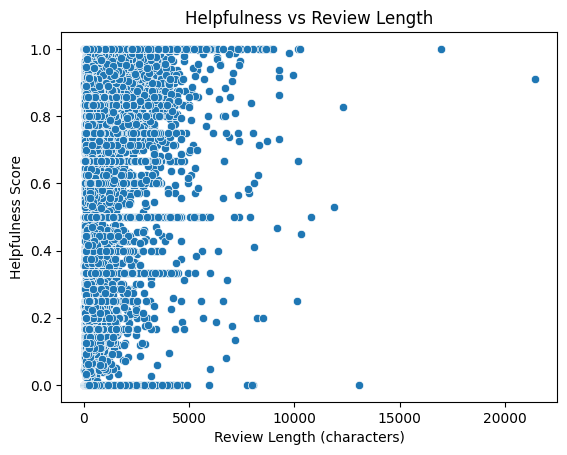

In [56]:
sns.scatterplot(x='ReviewLength', y='HelpfulnessScore', data=df.sample(300000))
plt.title("Helpfulness vs Review Length")
plt.xlabel("Review Length (characters)")
plt.ylabel("Helpfulness Score")
plt.show()

**There seems to be no correlation between the length of a review and its helpfulness score**. This apparent relationship is showed by the fact that for each review length, there's a vertical area almost completely filled with points; thus, there's great diversity in Helpfulness Score for each review length and no clear shape/correlation.

In the previous practice (P2), we got a Pearson coefficient of 0.041, indicating no strong linear correlation between the length of a review and its voted helpfulness.